In [2]:
import pandas as pd
import matplotlib as plt

df_Sales = pd.read_csv("Online Sales Data.csv")
df_Sales.head(4)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card


**Renaming the column names- Removing space**

In [3]:
df_Sales.rename(columns={
    'Transaction ID': 'Transaction_ID',
    'Date':'Date',
    'Product Category':'Product_Category',
    'Product Name':'Product_Name',
    'Units Sold':'Units_Sold',
    'Unit Price':'Unit_Price',
    'Total Revenue':'Total_Revenue',
    'Region':'Region',
    'Payment Method':'Payment_Method'
}, inplace=True)

df_Sales.tail(4)

,Transaction_ID,Date,Product_Category,Product_Name,Units_Sold,Unit_Price,Total_Revenue,Region,Payment_Method
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal
239,10240,2024-08-27,Sports,Yeti Rambler 20 oz Tumbler,2,29.99,59.98,Asia,Credit Card


**Changing the datatype of date column**

In [4]:
print(df_Sales.dtypes)

Transaction_ID        int64
Date                 object
Product_Category     object
Product_Name         object
Units_Sold            int64
Unit_Price          float64
Total_Revenue       float64
Region               object
Payment_Method       object
dtype: object


In [5]:
df_Sales['Date'] = pd.to_datetime(df_Sales['Date'])

In [36]:
print(df_Sales.dtypes)

Transaction_ID               int64
Date                datetime64[ns]
Product_Category            object
Product_Name                object
Units_Sold                   int64
Unit_Price                 float64
Total_Revenue              float64
Region                      object
Payment_Method              object
dtype: object


**Data Cleaning**
**Checking the null values in data set**

In [6]:
df_Sales.isnull().sum()

Transaction_ID      0
Date                0
Product_Category    0
Product_Name        0
Units_Sold          0
Unit_Price          0
Total_Revenue       0
Region              0
Payment_Method      0
dtype: int64

**Number of columns & rows**

In [7]:
df_Sales.shape

(240, 9)

In [8]:
df_Sales_Nonull = df_Sales.dropna()
df_Sales_Nonull.shape

(240, 9)

**Generating Insights from data set**

In [9]:
df_Sales.describe()

,Transaction_ID,Date,Units_Sold,Unit_Price,Total_Revenue
count,240.00000,240,240.000000,240.000000,240.000000
mean,10120.50000,2024-04-29 12:00:00,2.158333,236.395583,335.699375
min,10001.00000,2024-01-01 00:00:00,1.000000,6.500000,6.500000
25%,10060.75000,2024-02-29 18:00:00,1.000000,29.500000,62.965000
50%,10120.50000,2024-04-29 12:00:00,2.000000,89.990000,179.970000
75%,10180.25000,2024-06-28 06:00:00,3.000000,249.990000,399.225000
max,10240.00000,2024-08-27 00:00:00,10.000000,3899.990000,3899.990000
std,69.42622,NaN,1.322454,429.446695,485.804469


**Product wise sales**

In [50]:
df_Sales.groupby("Product_Category")["Total_Revenue"].mean()

Product_Category
Beauty Products     65.54750
Books               46.54825
Clothing           203.22325
Electronics        874.56025
Home Appliances    466.15400
Sports             358.16300
Name: Total_Revenue, dtype: float64

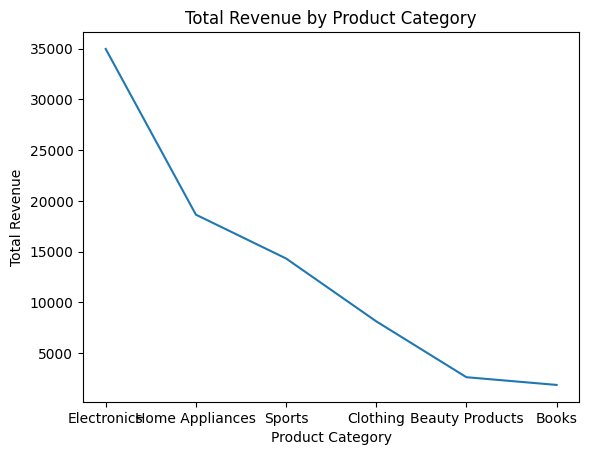

In [40]:
import matplotlib.pyplot as plt
df_product_category = df_Sales.groupby("Product_Category")["Total_Revenue"].sum()
df_product_category = df_product_category.sort_values(ascending=False)

df_product_category.plot(kind="line")
    
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Product Category")

plt.show()

**Average sales by all Region**

In [51]:
df_Sales.groupby("Region")["Total_Revenue"].mean()

Region
Asia             280.693125
Europe           265.850750
North America    460.554250
Name: Total_Revenue, dtype: float64

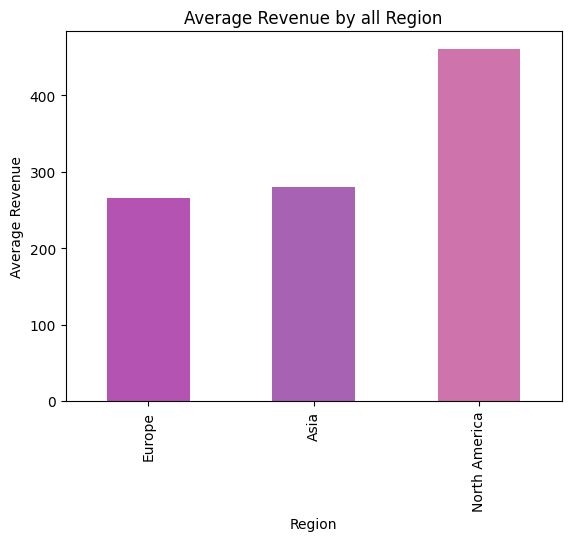

In [26]:
df_Region_Sales = df_Sales.groupby("Region")["Total_Revenue"].mean()
df_Region_Sales = df_Region_Sales.sort_values(ascending = True)
colors = ["#B553B2","#A762B4","#CF73AD"]
df_Region_Sales.plot(kind= "bar", color =colors[:len(df_Region_Sales)])

plt.xlabel("Region")
plt.ylabel("Average Revenue")
plt.title("Average Revenue by all Region")
plt.show()

**Maximum Revenue**

In [52]:
df_Sales["Total_Revenue"].max()

3899.99

**Revenue by Payment Methods**

<Axes: ylabel='Total_Revenue'>

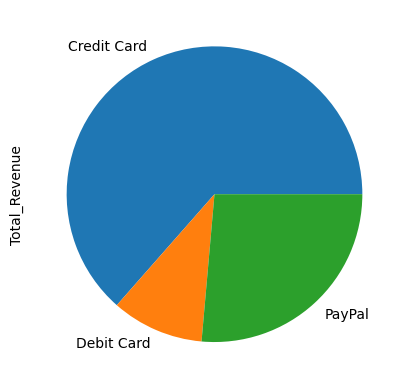

In [54]:
df_Sales.groupby("Payment_Method")["Total_Revenue"].sum().plot(kind="pie")


**Total Units Sold**

In [48]:
df_Sales["Units_Sold"].sum()

518

**Total Units Sold per Product Category**

In [51]:
df_Sales.groupby("Product_Category")["Units_Sold"].sum()

Product_Category
Beauty Products     46
Books              114
Clothing           145
Electronics         66
Home Appliances     59
Sports              88
Name: Units_Sold, dtype: int64

**Total Units Sold by each payment method**

In [60]:
df_Sales.groupby("Payment_Method")["Units_Sold"].sum()


Payment_Method
Credit Card    268
Debit Card     145
PayPal         105
Name: Units_Sold, dtype: int64